In the real estate market, accurately predicting the price of a house is crucial for both buyers and sellers to make informed decisions. However, the process is often complex due to the multitude of factors that can influence a house's price, such as its size, location, age, and amenities. Traditional methods of price estimation can be time-consuming and may not always capture the nuanced interactions between these factors.

Using machine learning methods develop a model to predict the price of houses given a data with 5000 records including the area, number of bedrooms, bathrooms, garage, age, etc

In [50]:
#importing necessary libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#import data
df = pd.read_csv('house_prices.csv')

In [ ]:
# price is the target

In [4]:
#first 5 rows
df.head()

,Area,Bedrooms,Bathrooms,Location,Age,Garage,Price
0,3774,4,2,Location3,23,0,814142.617182
1,4107,2,2,Location3,46,0,836259.082065
2,1460,3,3,Location2,113,1,296721.573960
3,1894,5,2,Location1,30,0,399099.591046
4,1730,3,2,Location5,67,0,441862.941002


### EDA

In [5]:
df.columns

Index(['Area', 'Bedrooms', 'Bathrooms', 'Location', 'Age', 'Garage', 'Price'], dtype='object')

In [6]:
#short description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       5000 non-null   int64  
 1   Bedrooms   5000 non-null   int64  
 2   Bathrooms  5000 non-null   int64  
 3   Location   5000 non-null   object 
 4   Age        5000 non-null   int64  
 5   Garage     5000 non-null   int64  
 6   Price      5000 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 273.6+ KB


In [7]:
#a simple statistical description
df.describe()

,Area,Bedrooms,Bathrooms,Age,Garage,Price
count,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,2567.655200,2.9982,1.976600,60.154600,1.008800,5.573903e+05
std,1120.887667,1.4140,0.819382,34.280037,0.819547,2.211179e+05
min,600.000000,1.0000,1.000000,1.000000,0.000000,4.047702e+04
25%,1592.750000,2.0000,1.000000,31.000000,0.000000,3.783680e+05
50%,2561.500000,3.0000,2.000000,60.000000,1.000000,5.477114e+05
75%,3550.250000,4.0000,3.000000,89.250000,2.000000,7.254004e+05
max,4499.000000,5.0000,3.000000,119.000000,2.000000,1.192210e+06


In [8]:
#a simple statistical description for the Categorical column, where (include='O') means include Object datatype
df.describe(include='O')

,Location
count,5000
unique,5
top,Location2
freq,1056


In [9]:
# checking if there is missing value
df.isnull().sum()

Area         0
Bedrooms     0
Bathrooms    0
Location     0
Age          0
Garage       0
Price        0
dtype: int64

There are no missing values in the data

#### Univariate Analysis

In [10]:
df.Bedrooms.value_counts()

Bedrooms
2    1039
5    1008
1     985
4     984
3     984
Name: count, dtype: int64

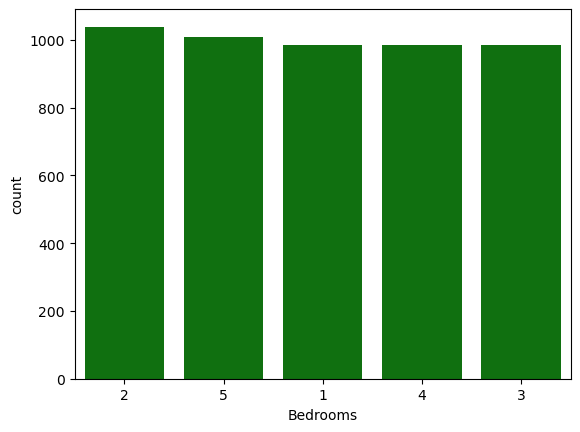

In [11]:
#count of all the number of bedrooms in descending order
sns.countplot(x=df.Bedrooms, color='green', order = df.Bedrooms.value_counts().keys() );

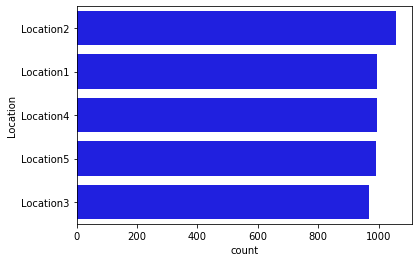

In [21]:
#count of all the location where the data was gotten from
sns.countplot(y=df.Location, color='blue', order = df.Location.value_counts().keys());

In [ ]:
# check for all houses that are more than 119 years

# new program with a dirty dataset

In [13]:
#import dirty data
df = pd.read_csv('house_prices_dirty.csv')

In [14]:
#first 5 rows
df.head()

,Area,Bedrooms,Bathrooms,Location,Age,Garage,Price
0,3774,4,2,Location3,23.0,0,814142.617200
1,4107,2,2,Location3,46.0,0,836259.082065
2,1460,3,3,Location2,113.0,1,296721.573960
3,1894,5,2,NaN,30.0,0,399099.591046
4,1730,3,2,Location5,67.0,0,441862.941002


## EDA

In [15]:
df.columns

Index(['Area', 'Bedrooms', 'Bathrooms', 'Location', 'Age', 'Garage', 'Price'], dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       5000 non-null   int64  
 1   Bedrooms   5000 non-null   int64  
 2   Bathrooms  5000 non-null   int64  
 3   Location   4969 non-null   object 
 4   Age        4907 non-null   float64
 5   Garage     5000 non-null   int64  
 6   Price      5000 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 273.6+ KB


In [ ]:
# Column Location and Age has incomplete data

In [18]:
#Statiscal description/detail of the dataset
df.describe()

,Area,Bedrooms,Bathrooms,Age,Garage,Price
count,5000.000000,5000.0000,5000.000000,4907.000000,5000.000000,5.000000e+03
mean,2567.655200,2.9982,1.976600,60.129407,1.008800,5.573903e+05
std,1120.887667,1.4140,0.819382,34.313983,0.819547,2.211179e+05
min,600.000000,1.0000,1.000000,1.000000,0.000000,4.047702e+04
25%,1592.750000,2.0000,1.000000,30.000000,0.000000,3.783680e+05
50%,2561.500000,3.0000,2.000000,60.000000,1.000000,5.477114e+05
75%,3550.250000,4.0000,3.000000,89.000000,2.000000,7.254004e+05
max,4499.000000,5.0000,3.000000,119.000000,2.000000,1.192210e+06


In [21]:
True == 1

True

In [23]:
False == 0

True

In [19]:
df.describe(include='O')

,Location
count,4969
unique,5
top,Location2
freq,1051


In [20]:
df.isnull().sum()

Area          0
Bedrooms      0
Bathrooms     0
Location     31
Age          93
Garage        0
Price         0
dtype: int64

In [29]:
#changing column names to small letters

df.columns= [x.lower() for x in df.columns]

In [33]:
df.columns

Index(['area', 'bedrooms', 'bathrooms', 'location', 'age', 'garage', 'price'], dtype='object')

In [32]:
df.head()

,area,bedrooms,bathrooms,location,age,garage,price
0,3774,4,2,Location3,23.0,0,814142.617200
1,4107,2,2,Location3,46.0,0,836259.082065
2,1460,3,3,Location2,113.0,1,296721.573960
3,1894,5,2,NaN,30.0,0,399099.591046
4,1730,3,2,Location5,67.0,0,441862.941002


## Dealing with missing values

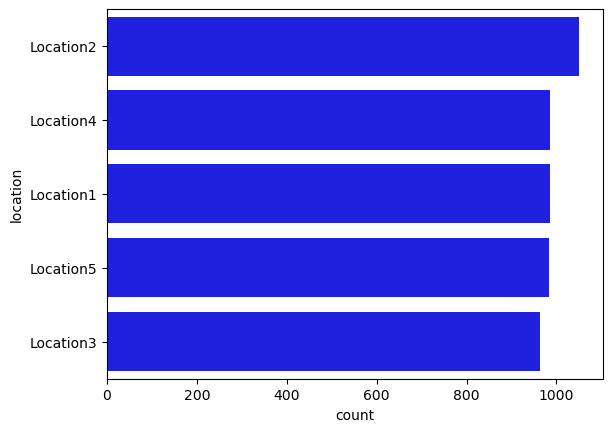

In [36]:
#count of all the location where the data was gotten from
sns.countplot(y=df.location, color='blue', order = df.location.value_counts().keys());

In [34]:
df['location']
#or df.location is same

0       Location3
1       Location3
2       Location2
3             NaN
4       Location5
          ...    
4995    Location3
4996    Location4
4997    Location2
4998    Location5
4999    Location2
Name: location, Length: 5000, dtype: object

In [38]:
df.location.mode()

0    Location2
Name: location, dtype: object

### We will fill the missing value with the mode Location(ie Location that occured the most)

In [39]:
most_location=df.location.mode()[0]

In [40]:
most_location

'Location2'

In [41]:
#df.location.fillna(most_location, inplace= true)
df.location=df.location.fillna(most_location)

### for Age

In [42]:
df.age.value_counts

<bound method IndexOpsMixin.value_counts of 0        23.0
1        46.0
2       113.0
3        30.0
4        67.0
        ...  
4995    118.0
4996     24.0
4997     66.0
4998     95.0
4999     86.0
Name: age, Length: 5000, dtype: float64>

In [48]:
age_mean= int(df.age.mean())

In [49]:
age_mean

60

In [44]:
df.age= df.age.fillna(age_mean)

In [55]:
df.columns

Index(['area', 'bedrooms', 'bathrooms', 'location', 'age', 'garage', 'price'], dtype='object')

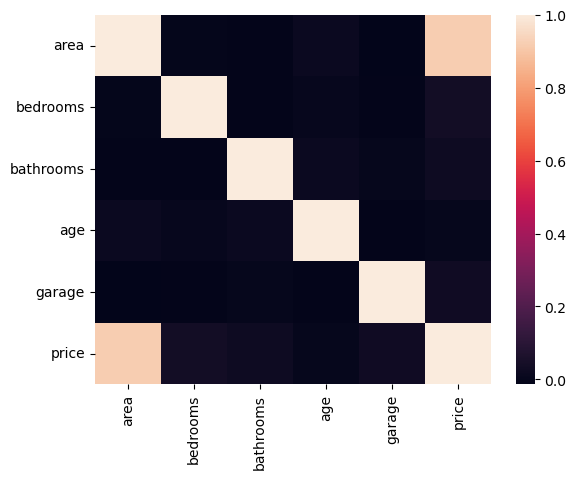

In [56]:
sns.heatmap(df.drop('location', axis=1).corr());

# Feature Engineering

In [57]:
df.head()

,area,bedrooms,bathrooms,location,age,garage,price
0,3774,4,2,Location3,23.0,0,814142.617200
1,4107,2,2,Location3,46.0,0,836259.082065
2,1460,3,3,Location2,113.0,1,296721.573960
3,1894,5,2,Location2,30.0,0,399099.591046
4,1730,3,2,Location5,67.0,0,441862.941002


In [59]:
df['rooms']=df['bedrooms'] + df['bathrooms']

In [60]:
df.head()

,area,bedrooms,bathrooms,location,age,garage,price,rooms
0,3774,4,2,Location3,23.0,0,814142.617200,6
1,4107,2,2,Location3,46.0,0,836259.082065,4
2,1460,3,3,Location2,113.0,1,296721.573960,6
3,1894,5,2,Location2,30.0,0,399099.591046,7
4,1730,3,2,Location5,67.0,0,441862.941002,5


In [61]:
df['average_room'] = df['area'] / df['bedrooms']

In [62]:
df.head()

,area,bedrooms,bathrooms,location,age,garage,price,rooms,average_room
0,3774,4,2,Location3,23.0,0,814142.617200,6,943.500000
1,4107,2,2,Location3,46.0,0,836259.082065,4,2053.500000
2,1460,3,3,Location2,113.0,1,296721.573960,6,486.666667
3,1894,5,2,Location2,30.0,0,399099.591046,7,378.800000
4,1730,3,2,Location5,67.0,0,441862.941002,5,576.666667
